In [8]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import time
import re
from selenium import webdriver
from selenium.webdriver.common.action_chains import ActionChains
import lxml
import openpyxl
import codecs
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 6.2) AppleWebKit/536.3 (KHTML, like Gecko) Chrome/19.0.1062.0 Safari/536.3"
}
wb = openpyxl.Workbook()    # 创建工作簿对象
sheet = wb.active           # 获取工作簿的活动表
sheet.title = "movie"       # 工作簿重命名
sheet.append(["排名", "电影名", "导演和主演", "上映时间", "上映地区", "电影类型", "评分", "评价人数", "引言"])
def get_movie(urls):
    rank = 1
    for url in urls:
        res = requests.get(url, headers=headers).text
        html = lxml.etree.HTML(res)
        # 先xpath定位提取到每个页面的所有li标签
        lis = html.xpath('//*[@id="content"]/div/div[1]/ol/li')
        # 每个li标签里有每部电影的基本信息
        for li in lis:
            name = li.xpath('.//div[@class="hd"]/a/span[1]/text()')[0]
            director_actor = li.xpath('.//div[@class="bd"]/p/text()')[0].strip()
            info = li.xpath('.//div[@class="bd"]/p/text()')[1].strip()
            # 按"/"切割成列表
            _info = info.split("/")
            # 得到 上映时间  上映地区  电影类型信息   去除两端多余空格
            time, area, genres = _info[0].strip(), _info[1].strip(), _info[2].strip()
            # print(time, area, genres)
            rating_score = li.xpath('.//div[@class="star"]/span[2]/text()')[0]
            rating_num = li.xpath('.//div[@class="star"]/span[4]/text()')[0]
            quote = li.xpath('.//p[@class="quote"]/span/text()')
            # 最后一页有部电影  九品芝麻官  没有一句话引言  加条件判断  防止报错
            if len(quote) == 0:
                quote = None
            else:
                quote = quote[0]
            sheet.append([rank, name, director_actor, time, area, genres, rating_score, rating_num, quote])
            rank += 1
    # 保存到文件
    wb.save("movie.xlsx")
'''豆瓣电影Top250'''
index_url = 'https://movie.douban.com/top250'
def get_html(url):
    html = requests.get(url, headers=headers).text
    return html
def create_list(html):
    soup = BeautifulSoup(html, 'lxml')
    movie_names = []
    movie_info = []
    for t in soup.find_all('div', 'hd'):
        name = t.find('span', 'title').get_text()
        movie_names.append(name)
    for t in soup.find_all('div', 'info'):
        info = t.find('p').get_text().replace(' ','')
        movie_info.append(info)
        next_page = soup.find('span', 'next').find('a')
    if next_page:
         return movie_names, movie_info, index_url + next_page['href']
    else:
         return movie_names, movie_info, None
def main():
    order = 1
    url = index_url
    with codecs.open('top250.txt', 'wb', encoding='utf-8') as f:
        while url:
            html = get_html(url)
            names, info, url = create_list(html)
            for n in range(25):
                f.write('Top ' + str(order) + ' ' + names[n] + '\r\n')
                f.write(info[n] + '\r\n')
                order = order+1
if __name__ == "__main__":
    # 列表推导式得到url列表  10页的电影信息  Top250
    url_list = ["https://movie.douban.com/top250?start={}&filter=".format(i * 25) for i in range(10)]

    get_movie(url_list)
    main()

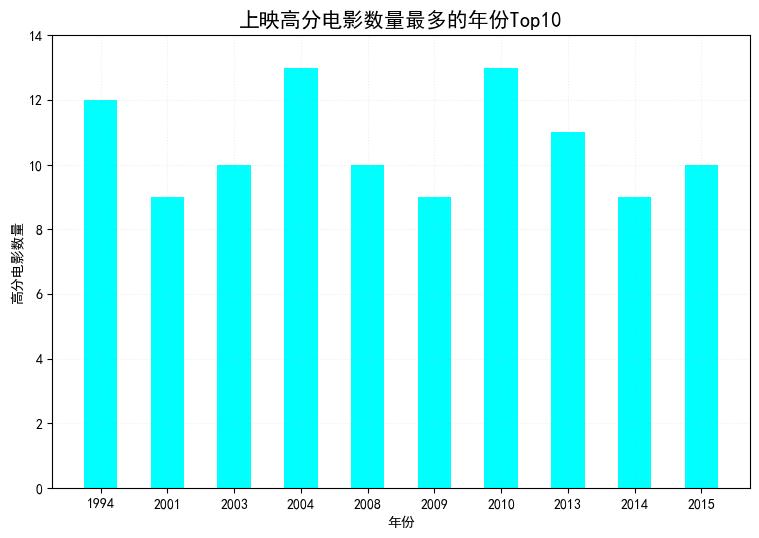

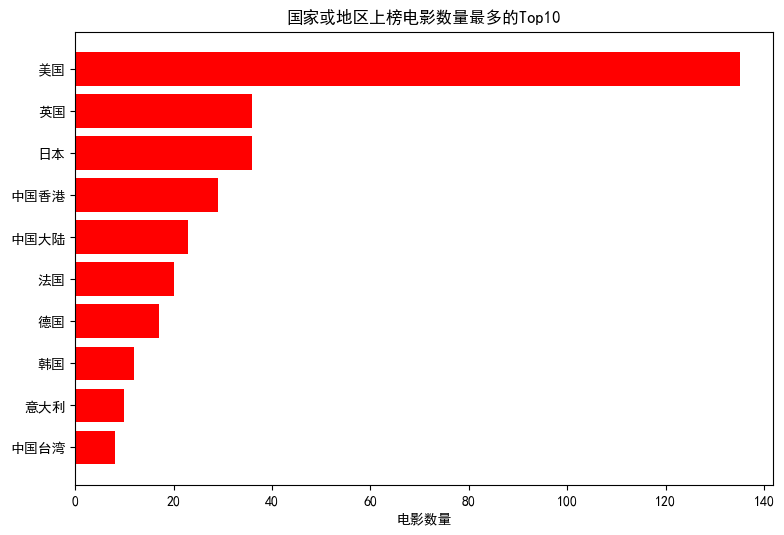

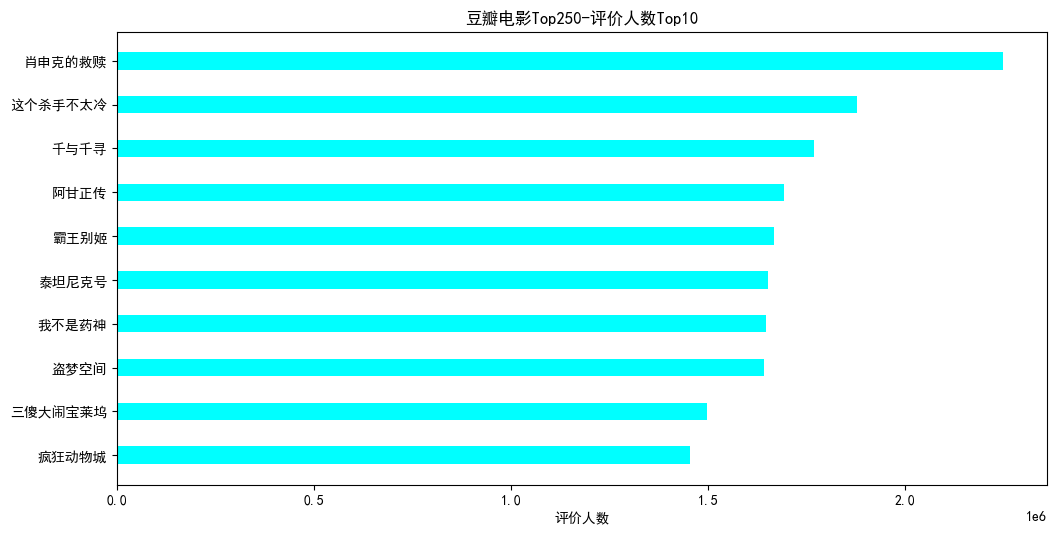

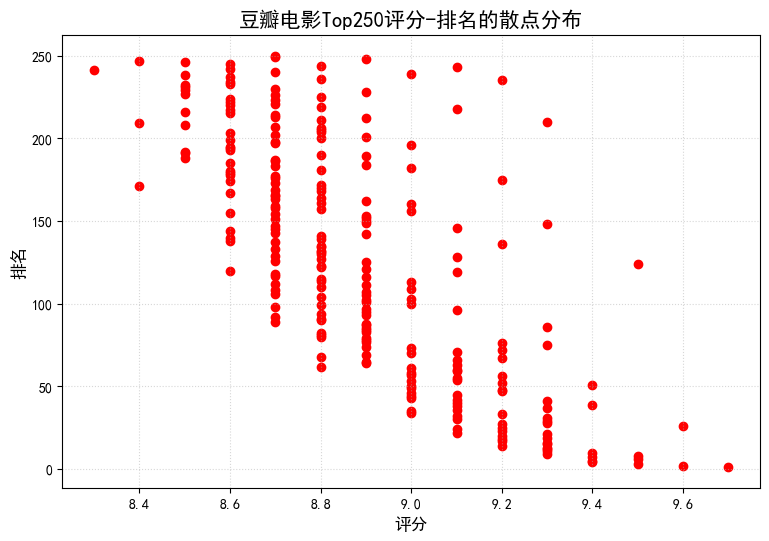

['肖申克', '救赎', '导演', '弗兰克', '德拉', '邦特', '主演', '蒂姆', '罗宾斯', '美国', '犯罪', '剧情', '霸王别姬', '导演', '陈凯歌', '主演', '张国荣', '张丰毅', '中国', '大陆', '中国香港', '剧情', '爱情', '同性', '阿甘正传', '导演', '罗伯特', '泽米', '吉斯', '主演', '汤姆', '汉克斯', '美国', '剧情', '爱情', '这个', '杀手', '太冷', '导演', '吕克', '贝松', '主演', '雷诺', '娜塔莉', '波特曼', '法国', '美国', '剧情', '动作', '犯罪', '泰坦尼克号', '导演', '詹姆斯', '卡梅隆', '主演', '莱昂纳多', '迪卡', '普里', '美国', '剧情', '爱情', '灾难', '美丽', '人生', '导演', '罗伯托', '贝尼尼', '主演', '罗伯托', '贝尼尼', '意大利', '剧情', '喜剧', '爱情', '战争', '千与千寻', '导演', '宫崎骏', '主演', '柊瑠美', '入野', '自由', '日本', '剧情', '动画', '奇幻', '辛德勒', '名单', '导演', '史蒂文', '斯皮尔伯格', '主演', '连姆', '尼森', '美国', '剧情', '历史', '战争', '盗梦', '空间', '导演', '克里斯托弗', '诺兰', '主演', '莱昂纳多', '迪卡', '普里', '美国', '英国', '剧情', '科幻', '悬疑', '冒险', '忠犬八公', '故事', '导演', '莱塞', '霍尔斯', '道姆', '主演', '理查', '基尔', '美国', '英国', '剧情', '星际', '穿越', '导演', '克里斯托弗', '诺兰', '主演', '马修', '麦康纳', '美国', '英国', '加拿大', '剧情', '科幻', '冒险', '海上', '钢琴师', '导演', '朱塞佩', '托纳多雷', '主演', '蒂姆', '罗斯', '意大利', '剧情', '音乐', '楚门', '世界', '导演', '彼得', '威尔', '主演', '凯瑞', '劳

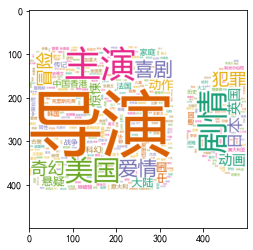

In [6]:
import pandas as pd
import re
import collections
from stylecloud import gen_stylecloud
import matplotlib.pyplot as plt
import jieba
from PIL import Image
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
jieba.setLogLevel(jieba.logging.INFO)

df = pd.read_excel("movie.xlsx",engine='openpyxl')
# print(type(df))    # <class 'pandas.core.frame.DataFrame'>
'''上映高分电影数量最多的年份Top10'''
show_time = list(df["上映时间"])
# 有上映时间数据是1961(中国大陆)这样的  处理一下  字符串切片
show_time = [s[:4] for s in show_time]
show_time_count = collections.Counter(show_time)
# 取数量最多的前10  得到一个列表  里面每个元素是元组
# (年份, 数量)
show_time_count = show_time_count.most_common(10)
# 字典推导式
show_time_dic = {k: v for k, v in show_time_count}
# 按年份排序
show_time = sorted(show_time_dic)
# 年份对应高分电影数量
counts = [show_time_dic[k] for k in show_time]
plt.figure(figsize=(9, 6), dpi=100)
# 绘制条形图
plt.bar(show_time, counts, width=0.5, color="cyan")
# y轴刻度重新设置一下
plt.yticks(range(0, 16, 2))
# 添加描述信息
plt.xlabel("年份")
plt.ylabel("高分电影数量")
plt.title("上映高分电影数量最多的年份Top10", fontsize=15)
# 添加网格  网格的透明度  线条样式
plt.grid(alpha=0.2, linestyle=":")
plt.savefig('test1.png')
plt.show()
'''国家或地区上榜电影数量最多的Top10'''
area = list(df['上映地区'])
sum_area = []
for x in area:
    x = x.split(" ")
    for i in x:
        sum_area.append(i)
area_count = collections.Counter(sum_area)
area_dic = dict(area_count)
area_count = [(k, v) for k, v in list(area_dic.items())]
# 按国家或地区上榜电影数量排序
area_count.sort(key=lambda k: k[1])
# 取国家或地区上榜电影数量最多的前十
area = [m[0] for m in area_count[-10:]]
nums = [m[1] for m in area_count[-10:]]
plt.figure(figsize=(9, 6), dpi=100)
# 绘制横着的条形图
plt.barh(area, nums, color='red')
# 添加描述信息
plt.xlabel('电影数量')
plt.title('国家或地区上榜电影数量最多的Top10')
plt.savefig('test2.png')
plt.show()
'''豆瓣电影Top250-评价人数Top10'''
name = list(df['电影名'])
ranting_num = list(df['评价人数'])
# (电影名, 评价人数)
info = [(m, int(n.split('人')[0])) for m, n in list(zip(name, ranting_num))]
# 按评价人数排序
info.sort(key=lambda x: x[1])
# print(info)
name = [x[0] for x in info[-10:]]
ranting_num = [x[1] for x in info[-10:]]
plt.figure(figsize=(12, 6), dpi=100)
# 绘制横着的条形图
plt.barh(name, ranting_num, color='cyan', height=0.4)
# 添加描述信息
plt.xlabel('评价人数')
plt.title('豆瓣电影Top250-评价人数Top10')
plt.savefig('test3.png')
plt.show()
'''豆瓣电影Top250评分-排名的散点分布'''
# 豆瓣电影Top250  排名  评分  散点图   描述关系
rating = list(df["排名"])
rating_score = list(df["评分"])
plt.figure(figsize=(9, 6), dpi=100)
# 绘制散点图  设置点的颜色
plt.scatter(rating_score, rating, c='r')
# 添加描述信息  设置字体大小
plt.xlabel("评分", fontsize=12)
plt.ylabel("排名", fontsize=12)
plt.title("豆瓣电影Top250评分-排名的散点分布", fontsize=15)
# 添加网格  网格的透明度  线条样式
plt.grid(alpha=0.5, linestyle=":")
plt.savefig('test4.png')
plt.show()
'''豆瓣电影Top250词云'''
# 读取数据
with open('top250.txt', encoding='utf-8') as f:
    data = f.read()
# 文本预处理  去除一些无用的字符   只提取出中文出来
new_data = re.findall('[\u4e00-\u9fa5]+', data, re.S)
new_data = " ".join(new_data)
# 文本分词
seg_list_exact = jieba.cut(new_data, cut_all=False)
result_list = []
with open('top250.txt', encoding='utf-8') as f:
    con = f.readlines()
    stop_words = set()
    for i in con:
        i = i.replace("\n", "")   # 去掉读取每一行数据的\n
        stop_words.add(i)
for word in seg_list_exact:
    # 设置停用词并去除单个词
    if word not in stop_words and len(word) > 1:
        result_list.append(word)
print(result_list)
gen_stylecloud(
    text=' '.join(result_list),
    size=500,
    collocations=False,
    font_path=r'C:\Windows\Fonts\msyh.ttc',
    output_name='test5.png',
    icon_name='fas fa-video',
    palette='colorbrewer.qualitative.Dark2_7'
)
img=Image.open('test5.png')
plt.figure("词云")
plt.imshow(img)
plt.show()
